## Цель проекта:
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Задание проекта:
Провести разведывательный анализ данных (EDA) по данным файла *stud_math.csv* и составить отчёт по его результатам.

## 1. Загрузка данных

In [70]:
# Загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from matplotlib.pyplot import subplots, show

In [71]:
# Загрузим файл с данными: stud_math.csv
# Make sure the url is the raw version of the file on GitHub
path_csv = 'https://raw.githubusercontent.com/ostrebko/skillfactory_rds/main/module_2/stud_math.csv'
download = requests.get(path_csv).content
df_stud_math = pd.read_csv(io.StringIO(download.decode('utf-8')))
df_stud_math.sample(10)

# path_csv = input('введите полный путь расположения stud_math.csv:')
# path_csv = '/home/user_name/ ... /stud_math.csv'

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,...,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-9.0,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,...,-6.0,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
62,GP,F,16,U,LE3,T,1.0,2.0,other,services,...,-6.0,yes,yes,no,4.0,4.0,3.0,1.0,4.0,45.0
229,GP,F,17,U,GT3,A,2.0,1.0,other,NaN,...,-9.0,yes,yes,yes,NaN,2.0,3.0,3.0,10.0,60.0
275,GP,F,17,U,LE3,T,2.0,2.0,services,other,...,-6.0,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,60.0
218,GP,F,17,U,GT3,T,2.0,3.0,at_home,other,...,-3.0,yes,no,no,3.0,3.0,3.0,3.0,3.0,40.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0
262,GP,M,18,R,GT3,T,3.0,2.0,other,other,...,-9.0,yes,no,no,5.0,3.0,2.0,3.0,1.0,60.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,...,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0


In [72]:
df_stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Общее число строк: 395; столбцов: 30, из которых 12 имеют тип float64, 1 - int64, 17 - object.  
Столбцы: 'sex', 'age', 'adress' имеют все 395 ненулевых элемента, в остальных имеются нулевые элементы.

### Описание датасета

Переменные, которые содержит датасет:

1. **school** — аббревиатура школы, в которой учится ученик  
2. **sex** — пол ученика ('F' - женский, 'M' - мужской)  
3. **age** — возраст ученика (от 15 до 22)  
4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом)  
5. **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)  
6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)  
7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)  
12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)  
13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  
14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)  
15. **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)  
16. **schoolsup** — дополнительная образовательная поддержка (yes или no)  
17. **famsup** — семейная образовательная поддержка (yes или no)  
18. **paid** — дополнительные платные занятия по математике (yes или no)  
19. **activities** — дополнительные внеучебные занятия (yes или no)  
20. **nursery** — посещал детский сад (yes или no)  
21. **studytime, granular** - переменная, не описанная в задании
22. **higher** — хочет получить высшее образование (yes или no)  
23. **internet** — наличие интернета дома (yes или no)  
24. **romantic** — в романтических отношениях (yes или no)  
25. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
26. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)  
27. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
28. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
29. **absences** — количество пропущенных занятий  
30. **score** — баллы по госэкзамену по математике

### Столбцы, названия
Приведем столбцы к единому стилю (в одно слово, с маленькой буквы):

In [73]:
# Исходные названия столбцов
df_stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [74]:
# Преобразованные названия столбцов:
df_stud_math.columns = list(map(lambda x:
                                x[0].lower() + '_' + x[1:] if x[0].isupper()
                                else x if ',' not in x
                                else x[x.find(',')+2:].strip(),
                                df_stud_math.columns))
df_stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

## 2. Первичный анализ данных в столбцах:

In [75]:
# выделим столбцы, относящиеся к типу 'object' и не относящиеся к типу 'object' (числа)
object_cols = [
    x for x in df_stud_math.columns if df_stud_math[x].dtypes == 'object']

numb_cols = [
    x for x in df_stud_math.columns if df_stud_math[x].dtypes != 'object']

print(object_cols)
print(numb_cols)

['school', 'sex', 'address', 'famsize', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['age', 'm_edu', 'f_edu', 'traveltime', 'studytime', 'failures', 'granular', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


In [76]:
def cols_prop(df, col_name):
    """ Функция для проведения предварительного анализа"""

    print('Column: {};'.format(col_name),
          'Type: {}'.format(df[col_name].dtypes), '\n',
          'Null Count: {};'.format(len(df[df[col_name].isna()])),
          'Unique: {}'.format(df[col_name].unique()), '\n')

In [77]:
# Проведение предварительного анализа по всем столбцам типа object
for col in object_cols:
    cols_prop(df_stud_math, col)

Column: school; Type: object 
 Null Count: 0; Unique: ['GP' 'MS'] 

Column: sex; Type: object 
 Null Count: 0; Unique: ['F' 'M'] 

Column: address; Type: object 
 Null Count: 17; Unique: ['U' nan 'R'] 

Column: famsize; Type: object 
 Null Count: 27; Unique: [nan 'GT3' 'LE3'] 

Column: p_status; Type: object 
 Null Count: 45; Unique: ['A' nan 'T'] 

Column: m_job; Type: object 
 Null Count: 19; Unique: ['at_home' 'health' 'other' 'services' 'teacher' nan] 

Column: f_job; Type: object 
 Null Count: 36; Unique: ['teacher' 'other' nan 'health' 'services' 'at_home'] 

Column: reason; Type: object 
 Null Count: 17; Unique: ['course' 'other' 'home' 'reputation' nan] 

Column: guardian; Type: object 
 Null Count: 31; Unique: ['mother' 'father' 'other' nan] 

Column: schoolsup; Type: object 
 Null Count: 9; Unique: ['yes' 'no' nan] 

Column: famsup; Type: object 
 Null Count: 39; Unique: ['no' 'yes' nan] 

Column: paid; Type: object 
 Null Count: 40; Unique: ['no' nan 'yes'] 

Column: activit

In [78]:
# Проведение предварительного анализа по всем столбцам не относящихся к типу object
for col in numb_cols:
    cols_prop(df_stud_math, col)

Column: age; Type: int64 
 Null Count: 0; Unique: [18 17 15 16 19 22 20 21] 

Column: m_edu; Type: float64 
 Null Count: 3; Unique: [ 4.  1.  3.  2. nan  0.] 

Column: f_edu; Type: float64 
 Null Count: 24; Unique: [ 4.  1.  2.  3. 40. nan  0.] 

Column: traveltime; Type: float64 
 Null Count: 28; Unique: [ 2.  1.  3. nan  4.] 

Column: studytime; Type: float64 
 Null Count: 7; Unique: [ 2.  3.  1. nan  4.] 

Column: failures; Type: float64 
 Null Count: 22; Unique: [ 0.  3. nan  2.  1.] 

Column: granular; Type: float64 
 Null Count: 7; Unique: [ -6.  -9.  -3.  nan -12.] 

Column: famrel; Type: float64 
 Null Count: 27; Unique: [ 4.  5.  3. nan -1.  2.  1.] 

Column: freetime; Type: float64 
 Null Count: 11; Unique: [ 3.  2.  4.  1.  5. nan] 

Column: goout; Type: float64 
 Null Count: 8; Unique: [ 4.  3.  2.  1.  5. nan] 

Column: health; Type: float64 
 Null Count: 15; Unique: [ 3.  5.  1.  2.  4. nan] 

Column: absences; Type: float64 
 Null Count: 12; Unique: [  6.   4.  10.   2. 

In [79]:
# Заменим nan на None (для удобства)
for col in df_stud_math.columns:
    df_stud_math[col] = df_stud_math[col].apply(
        lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [80]:
def object_type_analisys(df, col_name):
    """ Функция для проведения анализа по столбцу типа object"""

    print('\n', '\033[1m' + 'Столбец:' + col_name, '\033[0m', '\n')

    # в случае наличия данных в виде пробела
    df[col_name] = df[col_name].astype(str).apply(lambda x: None
                                                  if x.strip() == '' else x)

    print("Количество уникальных значений в столбце {}:".format(col_name))
    print(dict(df[col_name].value_counts()), '\n')

    print('Доли уникальных значений в столбце {}:'.format(col_name))
    print(dict(round(df[col_name].value_counts(normalize=True), 3)), '\n')

    print("Уникальных значений:", df[col_name].nunique())
    if df[col_name].nunique() > 2:
        print("Значений, встретившихся в столбце более (1/nunique) {}%: {}".
              format(round((1/df[col_name].nunique())*100, 2),
                     (df[col_name].value_counts()
                      > (1/df[col_name].nunique())*len(df[col_name])).sum()), '\n')
    else:
        print()

    df.loc[:, [col_name]].info()
    print()

### Номинативные переменные

#### Визуально более удобно анализировать данные столбцов типа object вне цикла (для наглядности)

In [81]:
print(object_cols)

['school', 'sex', 'address', 'famsize', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [82]:
print(len(object_cols))

17


In [83]:
# Для сокращения кода анализа можно провести в цикле
#for col in object_cols:
#    object_type_analisys(df_stud_math, col)

In [84]:
object_type_analisys(df_stud_math, 'school')


 Столбец:school  

Количество уникальных значений в столбце school:
{'GP': 349, 'MS': 46} 

Доли уникальных значений в столбце school:
{'GP': 0.884, 'MS': 0.116} 

Уникальных значений: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [85]:
object_type_analisys(df_stud_math, 'sex')


 Столбец:sex  

Количество уникальных значений в столбце sex:
{'F': 208, 'M': 187} 

Доли уникальных значений в столбце sex:
{'F': 0.527, 'M': 0.473} 

Уникальных значений: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [86]:
object_type_analisys(df_stud_math, 'address')


 Столбец:address  

Количество уникальных значений в столбце address:
{'U': 295, 'R': 83, 'None': 17} 

Доли уникальных значений в столбце address:
{'U': 0.747, 'R': 0.21, 'None': 0.043} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [87]:
object_type_analisys(df_stud_math, 'famsize')


 Столбец:famsize  

Количество уникальных значений в столбце famsize:
{'GT3': 261, 'LE3': 107, 'None': 27} 

Доли уникальных значений в столбце famsize:
{'GT3': 0.661, 'LE3': 0.271, 'None': 0.068} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [88]:
object_type_analisys(df_stud_math, 'p_status')


 Столбец:p_status  

Количество уникальных значений в столбце p_status:
{'T': 314, 'None': 45, 'A': 36} 

Доли уникальных значений в столбце p_status:
{'T': 0.795, 'None': 0.114, 'A': 0.091} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [89]:
object_type_analisys(df_stud_math, 'm_job')


 Столбец:m_job  

Количество уникальных значений в столбце m_job:
{'other': 133, 'services': 98, 'at_home': 58, 'teacher': 55, 'health': 32, 'None': 19} 

Доли уникальных значений в столбце m_job:
{'other': 0.337, 'services': 0.248, 'at_home': 0.147, 'teacher': 0.139, 'health': 0.081, 'None': 0.048} 

Уникальных значений: 6
Значений, встретившихся в столбце более (1/nunique) 16.67%: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [90]:
object_type_analisys(df_stud_math, 'f_job')


 Столбец:f_job  

Количество уникальных значений в столбце f_job:
{'other': 197, 'services': 102, 'None': 36, 'teacher': 29, 'at_home': 16, 'health': 15} 

Доли уникальных значений в столбце f_job:
{'other': 0.499, 'services': 0.258, 'None': 0.091, 'teacher': 0.073, 'at_home': 0.041, 'health': 0.038} 

Уникальных значений: 6
Значений, встретившихся в столбце более (1/nunique) 16.67%: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [91]:
object_type_analisys(df_stud_math, 'reason')


 Столбец:reason  

Количество уникальных значений в столбце reason:
{'course': 137, 'home': 104, 'reputation': 103, 'other': 34, 'None': 17} 

Доли уникальных значений в столбце reason:
{'course': 0.347, 'home': 0.263, 'reputation': 0.261, 'other': 0.086, 'None': 0.043} 

Уникальных значений: 5
Значений, встретившихся в столбце более (1/nunique) 20.0%: 3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [92]:
object_type_analisys(df_stud_math, 'guardian')


 Столбец:guardian  

Количество уникальных значений в столбце guardian:
{'mother': 250, 'father': 86, 'None': 31, 'other': 28} 

Доли уникальных значений в столбце guardian:
{'mother': 0.633, 'father': 0.218, 'None': 0.078, 'other': 0.071} 

Уникальных значений: 4
Значений, встретившихся в столбце более (1/nunique) 25.0%: 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [93]:
object_type_analisys(df_stud_math, 'schoolsup')


 Столбец:schoolsup  

Количество уникальных значений в столбце schoolsup:
{'no': 335, 'yes': 51, 'None': 9} 

Доли уникальных значений в столбце schoolsup:
{'no': 0.848, 'yes': 0.129, 'None': 0.023} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [94]:
object_type_analisys(df_stud_math, 'famsup')


 Столбец:famsup  

Количество уникальных значений в столбце famsup:
{'yes': 219, 'no': 137, 'None': 39} 

Доли уникальных значений в столбце famsup:
{'yes': 0.554, 'no': 0.347, 'None': 0.099} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [95]:
object_type_analisys(df_stud_math, 'paid')


 Столбец:paid  

Количество уникальных значений в столбце paid:
{'no': 200, 'yes': 155, 'None': 40} 

Доли уникальных значений в столбце paid:
{'no': 0.506, 'yes': 0.392, 'None': 0.101} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [96]:
object_type_analisys(df_stud_math, 'activities')


 Столбец:activities  

Количество уникальных значений в столбце activities:
{'yes': 195, 'no': 186, 'None': 14} 

Доли уникальных значений в столбце activities:
{'yes': 0.494, 'no': 0.471, 'None': 0.035} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [97]:
object_type_analisys(df_stud_math, 'nursery')


 Столбец:nursery  

Количество уникальных значений в столбце nursery:
{'yes': 300, 'no': 79, 'None': 16} 

Доли уникальных значений в столбце nursery:
{'yes': 0.759, 'no': 0.2, 'None': 0.041} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [98]:
object_type_analisys(df_stud_math, 'higher')


 Столбец:higher  

Количество уникальных значений в столбце higher:
{'yes': 356, 'None': 20, 'no': 19} 

Доли уникальных значений в столбце higher:
{'yes': 0.901, 'None': 0.051, 'no': 0.048} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [99]:
object_type_analisys(df_stud_math, 'internet')


 Столбец:internet  

Количество уникальных значений в столбце internet:
{'yes': 305, 'no': 56, 'None': 34} 

Доли уникальных значений в столбце internet:
{'yes': 0.772, 'no': 0.142, 'None': 0.086} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



In [100]:
object_type_analisys(df_stud_math, 'romantic')


 Столбец:romantic  

Количество уникальных значений в столбце romantic:
{'no': 240, 'yes': 124, 'None': 31} 

Доли уникальных значений в столбце romantic:
{'no': 0.608, 'yes': 0.314, 'None': 0.078} 

Уникальных значений: 3
Значений, встретившихся в столбце более (1/nunique) 33.33%: 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



### Числовые переменные

In [101]:
print(numb_cols)

['age', 'm_edu', 'f_edu', 'traveltime', 'studytime', 'failures', 'granular', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


In [102]:
print(len(numb_cols))

13


In [103]:
# Функция для вывода статистических характеристик столбцов с числами
def numb_type_analisys(df, col_name):

    print('\n', '\033[1m' + 'Столбец:' + col_name, '\033[0m', '\n')

    print("Количество уникальных значений в столбце {}:".format(col_name))
    print(dict(df[col_name].value_counts()), '\n')

    print('Доли уникальных значений в столбце {}:'.format(col_name))
    print(dict(round(df[col_name].value_counts(normalize=True), 3)), '\n')

    # Данные для анализа выбросов
    IQR = df[col_name].quantile(0.75) - df[col_name].quantile(0.25)
    perc25 = df[col_name].quantile(0.25)
    perc75 = df[col_name].quantile(0.75)
    out_left = perc25 - 1.5*IQR
    out_right = perc75 + 1.5*IQR

    print('Статистические параметры столбца {}:'.format(col_name))
    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=out_left, l=out_right),
        '\n')

    if out_left > min(df[col_name]):
        print('Имеются выбросы в области минимальных значений')
    if out_right < max(df[col_name]):
        print('Имеются выбросы в области максимальных значений')
    if (out_left < min(df[col_name])) and (out_right > max(df[col_name])):
        print('Выбросов нет')

    display(df[col_name].describe())

    df[col_name].hist(bins=np.arange(min(df[col_name]), max(df[col_name])+1, 0.5),
                      align='left',
                      label=col_name)
    plt.legend()


 Столбец:age  

Количество уникальных значений в столбце age:
{16: 104, 17: 98, 15: 82, 18: 82, 19: 24, 20: 3, 21: 1, 22: 1} 

Доли уникальных значений в столбце age:
{16: 0.263, 17: 0.248, 15: 0.208, 18: 0.208, 19: 0.061, 20: 0.008, 21: 0.003, 22: 0.003} 

Статистические параметры столбца age:
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0]. 

Имеются выбросы в области максимальных значений


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

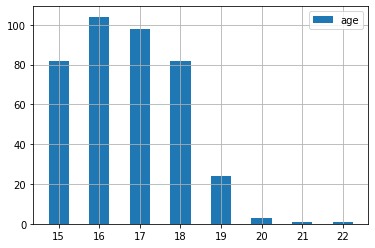

In [104]:
numb_type_analisys(df_stud_math, 'age')

**Предварительные выводы по столбцу age:**  
1. Данные соответствуют условиям задачи. 
2. Видно, что после 16 лет с увеличением возраста количество учеников снижается.  
3. Число 22 выбросом не считаем, так как по условию задачи, возраст учеников от 15 до 22 лет.


 Столбец:m_edu  

Количество уникальных значений в столбце m_edu:
{4.0: 131, 2.0: 102, 3.0: 97, 1.0: 59, 0.0: 3} 

Доли уникальных значений в столбце m_edu:
{4.0: 0.334, 2.0: 0.26, 3.0: 0.247, 1.0: 0.151, 0.0: 0.008} 

Статистические параметры столбца m_edu:
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0]. 

Выбросов нет


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

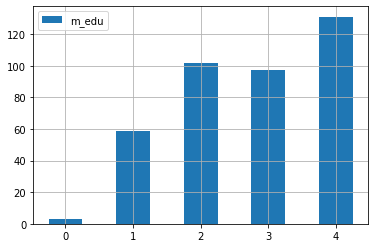

In [105]:
numb_type_analisys(df_stud_math, 'm_edu')

**Предварительные выводы по столбцу m_edu:**  
1. Данные соответствуют условиям задачи. 
2. Видно, что матерей без образования достаточно мало: меньше 3.5 процентов. Доля матерей с высшим образованием больше доли матерей с образованием школы или средним образованием.  


 Столбец:f_edu  

Количество уникальных значений в столбце f_edu:
{2.0: 106, 3.0: 96, 4.0: 88, 1.0: 78, 0.0: 2, 40.0: 1} 

Доли уникальных значений в столбце f_edu:
{2.0: 0.286, 3.0: 0.259, 4.0: 0.237, 1.0: 0.21, 0.0: 0.005, 40.0: 0.003} 

Статистические параметры столбца f_edu:
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5]. 

Имеются выбросы в области минимальных значений
Имеются выбросы в области максимальных значений


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: f_edu, dtype: float64

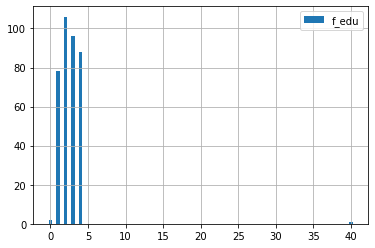

In [106]:
numb_type_analisys(df_stud_math, 'f_edu')

**Предварительные выводы по столбцу f_edu:**  
1. В данных имеется выброс в области максимальных значений.
2. В области минимальных значений 0 - выбросом не считаем, так как соответствует условия задачи.
3. Видно, что отцов без образования достаточно мало: меньше 3 процентов.
4. Доли отцов у которых есть образование сравнимы, разница не превышает 8 процентов.

In [107]:
# После предварительного анализа с учетом условия задачи, исключаем выбросы >4
df_stud_math = df_stud_math.loc[df_stud_math.f_edu <= 4]
# можно также предположить, что 40 - опечатка для значений 4 или 0.


 Столбец:f_edu  

Количество уникальных значений в столбце f_edu:
{2.0: 106, 3.0: 96, 4.0: 88, 1.0: 78, 0.0: 2} 

Доли уникальных значений в столбце f_edu:
{2.0: 0.286, 3.0: 0.259, 4.0: 0.238, 1.0: 0.211, 0.0: 0.005} 

Статистические параметры столбца f_edu:
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5]. 

Имеются выбросы в области минимальных значений


count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

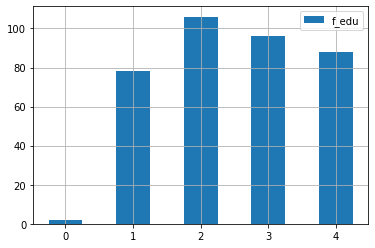

In [108]:
# Повторный анализ столбца 'f_edu' после исключения выбросов
numb_type_analisys(df_stud_math, 'f_edu')


 Столбец:traveltime  

Количество уникальных значений в столбце traveltime:
{1.0: 225, 2.0: 92, 3.0: 21, 4.0: 7} 

Доли уникальных значений в столбце traveltime:
{1.0: 0.652, 2.0: 0.267, 3.0: 0.061, 4.0: 0.02} 

Статистические параметры столбца traveltime:
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5]. 

Имеются выбросы в области максимальных значений


count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

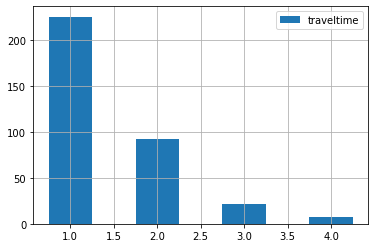

In [109]:
numb_type_analisys(df_stud_math, 'traveltime')

**Предварительные выводы по столбцу traveltime:**  
1. В данных показан выброс в области максимальных значений, выбросом не считаем, так как по здравому смыслу время до школы может быть больше 60 мин и соответствует описанию задачи (значение 4 - возможно).
2. Большая часть детей (более 60%) тратит менее 15 мин до школы


 Столбец:studytime  

Количество уникальных значений в столбце studytime:
{2.0: 182, 1.0: 98, 3.0: 58, 4.0: 25} 

Доли уникальных значений в столбце studytime:
{2.0: 0.501, 1.0: 0.27, 3.0: 0.16, 4.0: 0.069} 

Статистические параметры столбца studytime:
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5]. 

Имеются выбросы в области максимальных значений


count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

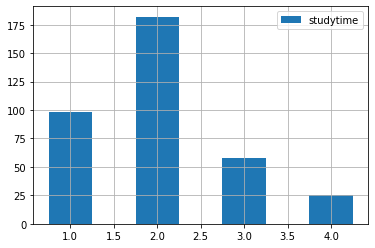

In [110]:
numb_type_analisys(df_stud_math, 'studytime')

**Предварительные выводы по столбцу traveltime:**  
1. В данных показан выброс в области максимальных значений, выбросом не считаем, так как по здравому смыслу время на учёбу помимо школы в неделю может быть больше 10 ч и соответствует описанию задачи (значение 4 - возможно).
2. Большая часть детей (больше 49%) тратит 2-5 часов в неделю на учёбу помимо школы.


 Столбец:failures  

Количество уникальных значений в столбце failures:
{0.0: 277, 1.0: 45, 3.0: 15, 2.0: 14} 

Доли уникальных значений в столбце failures:
{0.0: 0.789, 1.0: 0.128, 3.0: 0.043, 2.0: 0.04} 

Статистические параметры столбца failures:
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0]. 

Имеются выбросы в области максимальных значений


count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

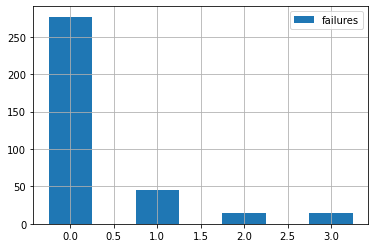

In [111]:
numb_type_analisys(df_stud_math, 'failures')

**Предварительные выводы по столбцу failures:**  
1. В данных показан выброс в области максимальных значений, выбросом не считаем, так как по условию задачи  количество внеучебных неудач (n, если 1<=n<=3, иначе 0). 
2. Большая часть школьников (больше 74%) либо не имела внеучебных неудач, либо число внеучебных неудач было > 3.


 Столбец:granular  

Количество уникальных значений в столбце granular:
{-6.0: 182, -3.0: 98, -9.0: 58, -12.0: 25} 

Доли уникальных значений в столбце granular:
{-6.0: 0.501, -3.0: 0.27, -9.0: 0.16, -12.0: 0.069} 

Статистические параметры столбца granular:
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5]. 

Имеются выбросы в области минимальных значений


count    363.000000
mean      -6.082645
std        2.521466
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

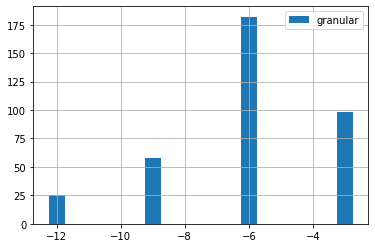

In [112]:
numb_type_analisys(df_stud_math, 'granular')

**Предварительные выводы по столбцу granular:**  
1. Столбец не описан в условиях задачи. При отсутствии корреляции со score или при сильной корреляции с другими столбцами возможно исключение из датасета.


 Столбец:famrel  

Количество уникальных значений в столбце famrel:
{4.0: 168, 5.0: 95, 3.0: 59, 2.0: 16, 1.0: 7, -1.0: 1} 

Доли уникальных значений в столбце famrel:
{4.0: 0.486, 5.0: 0.275, 3.0: 0.171, 2.0: 0.046, 1.0: 0.02, -1.0: 0.003} 

Статистические параметры столбца famrel:
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5]. 

Имеются выбросы в области минимальных значений


count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

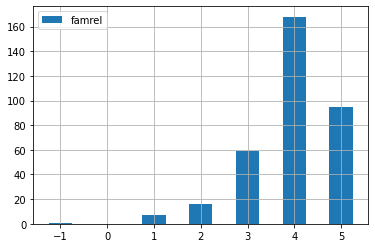

In [113]:
numb_type_analisys(df_stud_math, 'famrel')

**Предварительные выводы по столбцу famrel:**  
1. В данных показан выброс в области минимальных значений, выбросом считаем все, что меньше 1, так как по условию задачи: семейные отношения (от 1 - очень плохо до 5 - очень хорошо).
2. Большая часть семей имеет хорошие семейные отношения (больше 45%).

In [114]:
# После предварительного анализа с учетом условия задачи, исключаем выбросы:
df_stud_math = df_stud_math.loc[df_stud_math.famrel >= 1]
# можно также предположить, что -1 - опечатка для значений 1.


 Столбец:famrel  

Количество уникальных значений в столбце famrel:
{4.0: 168, 5.0: 95, 3.0: 59, 2.0: 16, 1.0: 7} 

Доли уникальных значений в столбце famrel:
{4.0: 0.487, 5.0: 0.275, 3.0: 0.171, 2.0: 0.046, 1.0: 0.02} 

Статистические параметры столбца famrel:
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5]. 

Имеются выбросы в области минимальных значений


count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

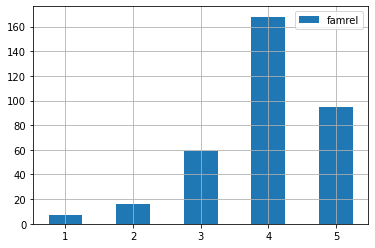

In [115]:
# Повторный анализ после исключения выбросов с учетом условия задачи
numb_type_analisys(df_stud_math, 'famrel')


 Столбец:freetime  

Количество уникальных значений в столбце freetime:
{3.0: 134, 4.0: 97, 2.0: 54, 5.0: 34, 1.0: 17} 

Доли уникальных значений в столбце freetime:
{3.0: 0.399, 4.0: 0.289, 2.0: 0.161, 5.0: 0.101, 1.0: 0.051} 

Статистические параметры столбца freetime:
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5]. 

Имеются выбросы в области минимальных значений


count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

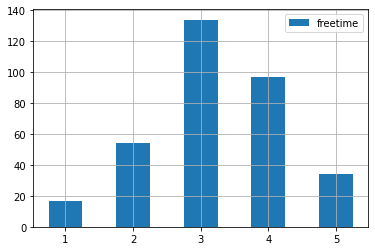

In [116]:
numb_type_analisys(df_stud_math, 'freetime')

**Предварительные выводы по столбцу freetime:**  
1. В данных показан выброс в области минимальных значений, выбросом не считаем, так как по условию задачи  свободное время после школы (от 1 - очень мало до 5 - очень мого). 
2. Большая часть школьников (больше 38%) имеет средние значения свободного времени.


 Столбец:goout  

Количество уникальных значений в столбце goout:
{3.0: 115, 2.0: 87, 4.0: 71, 5.0: 45, 1.0: 19} 

Доли уникальных значений в столбце goout:
{3.0: 0.341, 2.0: 0.258, 4.0: 0.211, 5.0: 0.134, 1.0: 0.056} 

Статистические параметры столбца goout:
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0]. 

Выбросов нет


count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

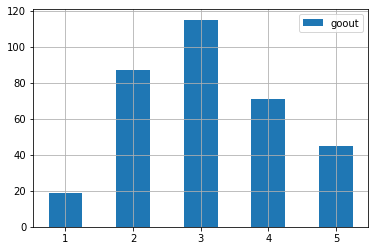

In [117]:
numb_type_analisys(df_stud_math, 'goout')

**Предварительные выводы по столбцу goout:**  
1. Данные соответствуют условию задачи. 
2. Большая часть школьников (больше 33%) имеет средние значения проведения времени с друзьями.


 Столбец:health  

Количество уникальных значений в столбце health:
{5.0: 111, 3.0: 81, 4.0: 58, 1.0: 42, 2.0: 40} 

Доли уникальных значений в столбце health:
{5.0: 0.334, 3.0: 0.244, 4.0: 0.175, 1.0: 0.127, 2.0: 0.12} 

Статистические параметры столбца health:
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0]. 

Выбросов нет


count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

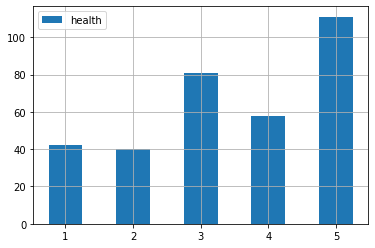

In [118]:
numb_type_analisys(df_stud_math, 'health')

**Предварительные выводы по столбцу health:**  
1. Данные соответствуют условию задачи. 
2. Большая часть школьников (больше 32%) имеет очень хорошее текущее состояние здоровья.


 Столбец:absences  

Количество уникальных значений в столбце absences:
{0.0: 95, 2.0: 54, 4.0: 47, 6.0: 27, 8.0: 21, 10.0: 14, 12.0: 11, 14.0: 9, 3.0: 8, 16.0: 7, 7.0: 5, 18.0: 4, 5.0: 4, 22.0: 3, 20.0: 3, 15.0: 2, 9.0: 2, 1.0: 2, 40.0: 1, 38.0: 1, 56.0: 1, 23.0: 1, 24.0: 1, 25.0: 1, 385.0: 1, 11.0: 1, 13.0: 1, 17.0: 1, 21.0: 1, 212.0: 1, 28.0: 1, 26.0: 1, 54.0: 1} 

Доли уникальных значений в столбце absences:
{0.0: 0.285, 2.0: 0.162, 4.0: 0.141, 6.0: 0.081, 8.0: 0.063, 10.0: 0.042, 12.0: 0.033, 14.0: 0.027, 3.0: 0.024, 16.0: 0.021, 7.0: 0.015, 18.0: 0.012, 5.0: 0.012, 22.0: 0.009, 20.0: 0.009, 15.0: 0.006, 9.0: 0.006, 1.0: 0.006, 40.0: 0.003, 38.0: 0.003, 56.0: 0.003, 23.0: 0.003, 24.0: 0.003, 25.0: 0.003, 385.0: 0.003, 11.0: 0.003, 13.0: 0.003, 17.0: 0.003, 21.0: 0.003, 212.0: 0.003, 28.0: 0.003, 26.0: 0.003, 54.0: 0.003} 

Статистические параметры столбца absences:
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0]. 

Имеются выбросы в области 

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

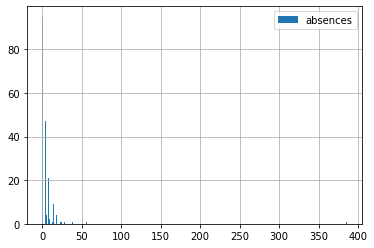

In [119]:
numb_type_analisys(df_stud_math, 'absences')

**Предварительные выводы по столбцу absences:**  
1. Не известно, сколько занятий у школьников в году, чтобы сравнивать число пропущенных занятий.
2. Большие разрывы между числом пропущенных значений начинаются после 28. С учетом здравого смысла предположим, что пропуск до 28 занятий все же возможен. Далее уже идут выбросы.
3. После исключения выбросов и повторного анализа статистика немного изменится.
4. Видна тенденция по уменьшению количества школьников с увеличением количества прогулов 
5. Примечание: По разным источникам информации (неподтвержденные, сеть интернет), если школьник пропустил от 6 (в штате Калифорния) до 10 занятий (общие данные), то он остается на второй год (т.е. скорее не будет допущен до экзамена / итогового теста). Таким образом, можно исключить выбросы с учетом статистики (пропуск более 20 занятий - выброс). Однако, при этом будут исключены 15 значений, что составляет около 3,8%, что с учетом недостатка данных может ухудшить последующее обучение модели. Указанное примечание можно дополнительно учесть, для исключения выбросов с учетом статистики и сравнения качества модели.

In [120]:
# Исключаем выбросы
df_stud_math = df_stud_math.loc[df_stud_math.absences <= 28]


 Столбец:absences  

Количество уникальных значений в столбце absences:
{0.0: 95, 2.0: 54, 4.0: 47, 6.0: 27, 8.0: 21, 10.0: 14, 12.0: 11, 14.0: 9, 3.0: 8, 16.0: 7, 7.0: 5, 18.0: 4, 5.0: 4, 20.0: 3, 22.0: 3, 15.0: 2, 1.0: 2, 9.0: 2, 26.0: 1, 11.0: 1, 21.0: 1, 17.0: 1, 28.0: 1, 13.0: 1, 25.0: 1, 24.0: 1, 23.0: 1} 

Доли уникальных значений в столбце absences:
{0.0: 0.291, 2.0: 0.165, 4.0: 0.144, 6.0: 0.083, 8.0: 0.064, 10.0: 0.043, 12.0: 0.034, 14.0: 0.028, 3.0: 0.024, 16.0: 0.021, 7.0: 0.015, 18.0: 0.012, 5.0: 0.012, 20.0: 0.009, 22.0: 0.009, 15.0: 0.006, 1.0: 0.006, 9.0: 0.006, 26.0: 0.003, 11.0: 0.003, 21.0: 0.003, 17.0: 0.003, 28.0: 0.003, 13.0: 0.003, 25.0: 0.003, 24.0: 0.003, 23.0: 0.003} 

Статистические параметры столбца absences:
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0]. 

Имеются выбросы в области максимальных значений


count    327.000000
mean       5.048930
std        5.722954
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       28.000000
Name: absences, dtype: float64

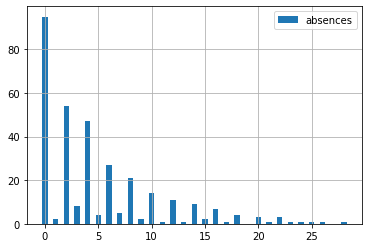

In [121]:
# Повторяем анализ статистики после исключения данных (при повторе уже не смотрим на выбросы):
numb_type_analisys(df_stud_math, 'absences')


 Столбец:score  

Количество уникальных значений в столбце score:
{50.0: 50, 55.0: 40, 0.0: 30, 65.0: 28, 75.0: 25, 60.0: 25, 70.0: 23, 40.0: 22, 45.0: 19, 80.0: 16, 30.0: 14, 90.0: 10, 35.0: 8, 25.0: 5, 85.0: 3, 95.0: 2, 20.0: 1, 100.0: 1} 

Доли уникальных значений в столбце score:
{50.0: 0.155, 55.0: 0.124, 0.0: 0.093, 65.0: 0.087, 75.0: 0.078, 60.0: 0.078, 70.0: 0.071, 40.0: 0.068, 45.0: 0.059, 80.0: 0.05, 30.0: 0.043, 90.0: 0.031, 35.0: 0.025, 25.0: 0.016, 85.0: 0.009, 95.0: 0.006, 20.0: 0.003, 100.0: 0.003} 

Статистические параметры столбца score:
25-й перцентиль: 45.0, 75-й перцентиль: 65.0, IQR: 20.0,  Границы выбросов: [15.0, 95.0]. 

Имеются выбросы в области минимальных значений
Имеются выбросы в области максимальных значений


count    322.000000
mean      52.204969
std       22.519253
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

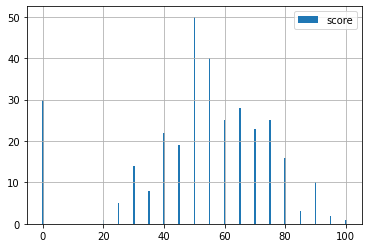

In [122]:
numb_type_analisys(df_stud_math, 'score')

**Предварительные выводы по столбцу score:**  
1. Зачения лежит в интервале от 0 до 100, таким образом практически возможно получение указанных баллов по гос экзамену, не смотря на то, что по статистическим хараактеристикам имеются выбросы. Данные соответствуют здравому смыслу. Так как значений с 0 баллов не одно, то их оставляем. 
2. Примечание: Можно дополнительно также рассмотреть датасет, с исключением значения 0 по параметру score, так как между указанным значением имеется разрыв в котором данные отсуствуют данные).

In [123]:
df_stud_math.describe()

,age,m_edu,f_edu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
count,327.000000,324.000000,327.000000,304.000000,322.000000,308.000000,322.000000,327.000000,319.000000,319.000000,314.000000,327.000000,322.000000
mean,16.691131,2.750000,2.498471,1.473684,2.034161,0.321429,-6.102484,3.957187,3.228840,3.090909,3.474522,5.048930,52.204969
std,1.269999,1.105503,1.093412,0.712430,0.851285,0.742341,2.553855,0.905675,1.003601,1.099405,1.382566,5.722954,22.519253
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,45.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,65.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,28.000000,100.000000


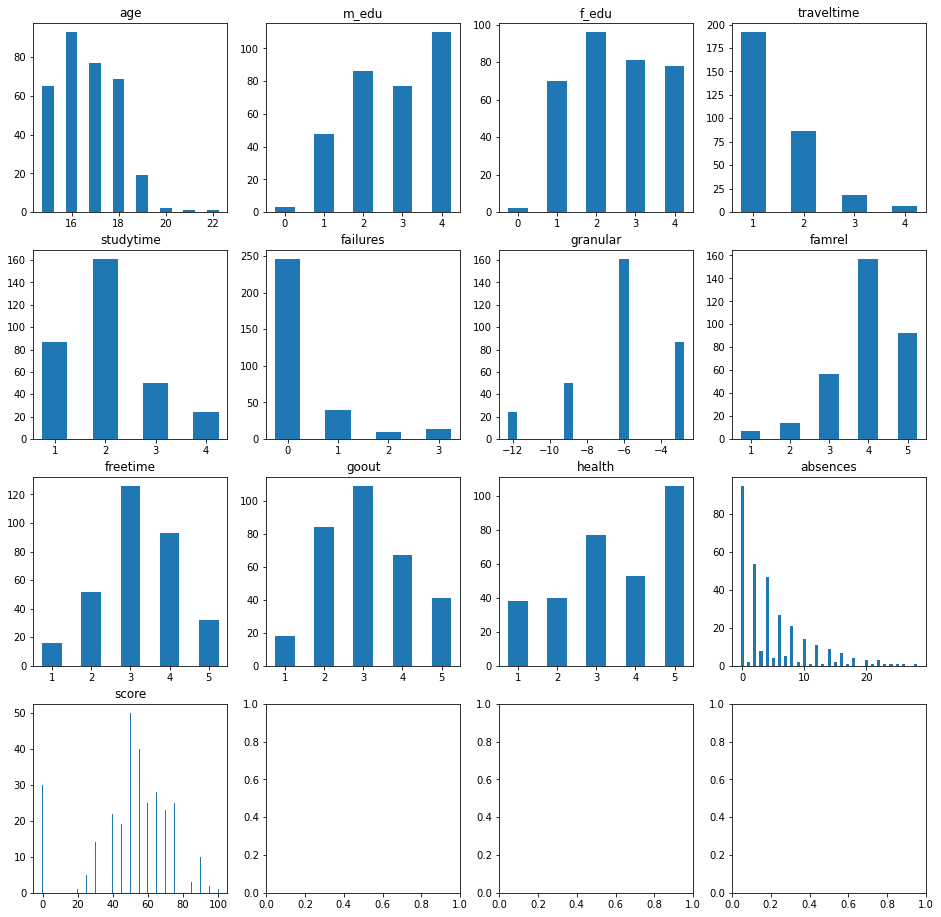

In [124]:
numb_graph_y = 4
numb_graph_x = 4
ind_i = 0
ind_j = 0

fig, axes = plt.subplots(numb_graph_y, numb_graph_x, figsize=(16, 16))
for col in numb_cols:
    if ind_j < numb_graph_x:
        axes[ind_i][ind_j].hist(df_stud_math[col],
                                bins=np.arange(min(df_stud_math[col]),
                                               max(df_stud_math[col])+1, 0.5),
                                align='left')
        axes[ind_i][ind_j].set_title(col)
        ind_j += 1
    else:
        ind_j = 0
        ind_i += 1
        axes[ind_i][ind_j].hist(df_stud_math[col],
                                bins=np.arange(min(df_stud_math[col]),
                                               max(df_stud_math[col])+1, 0.5),
                                align='left')
        axes[ind_i][ind_j].set_title(col)
        ind_j += 1

## 3. Корреляционный анализ

Выясним, какие столбцы коррелируют коррелируют между собой, в т.ч. с оценкой score. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.  
Корреляции рассмотрим только для числовых столбцов.  
Для быстрого построения графиков зависимости переменных используем функцию pairplot из модуля seaborn:

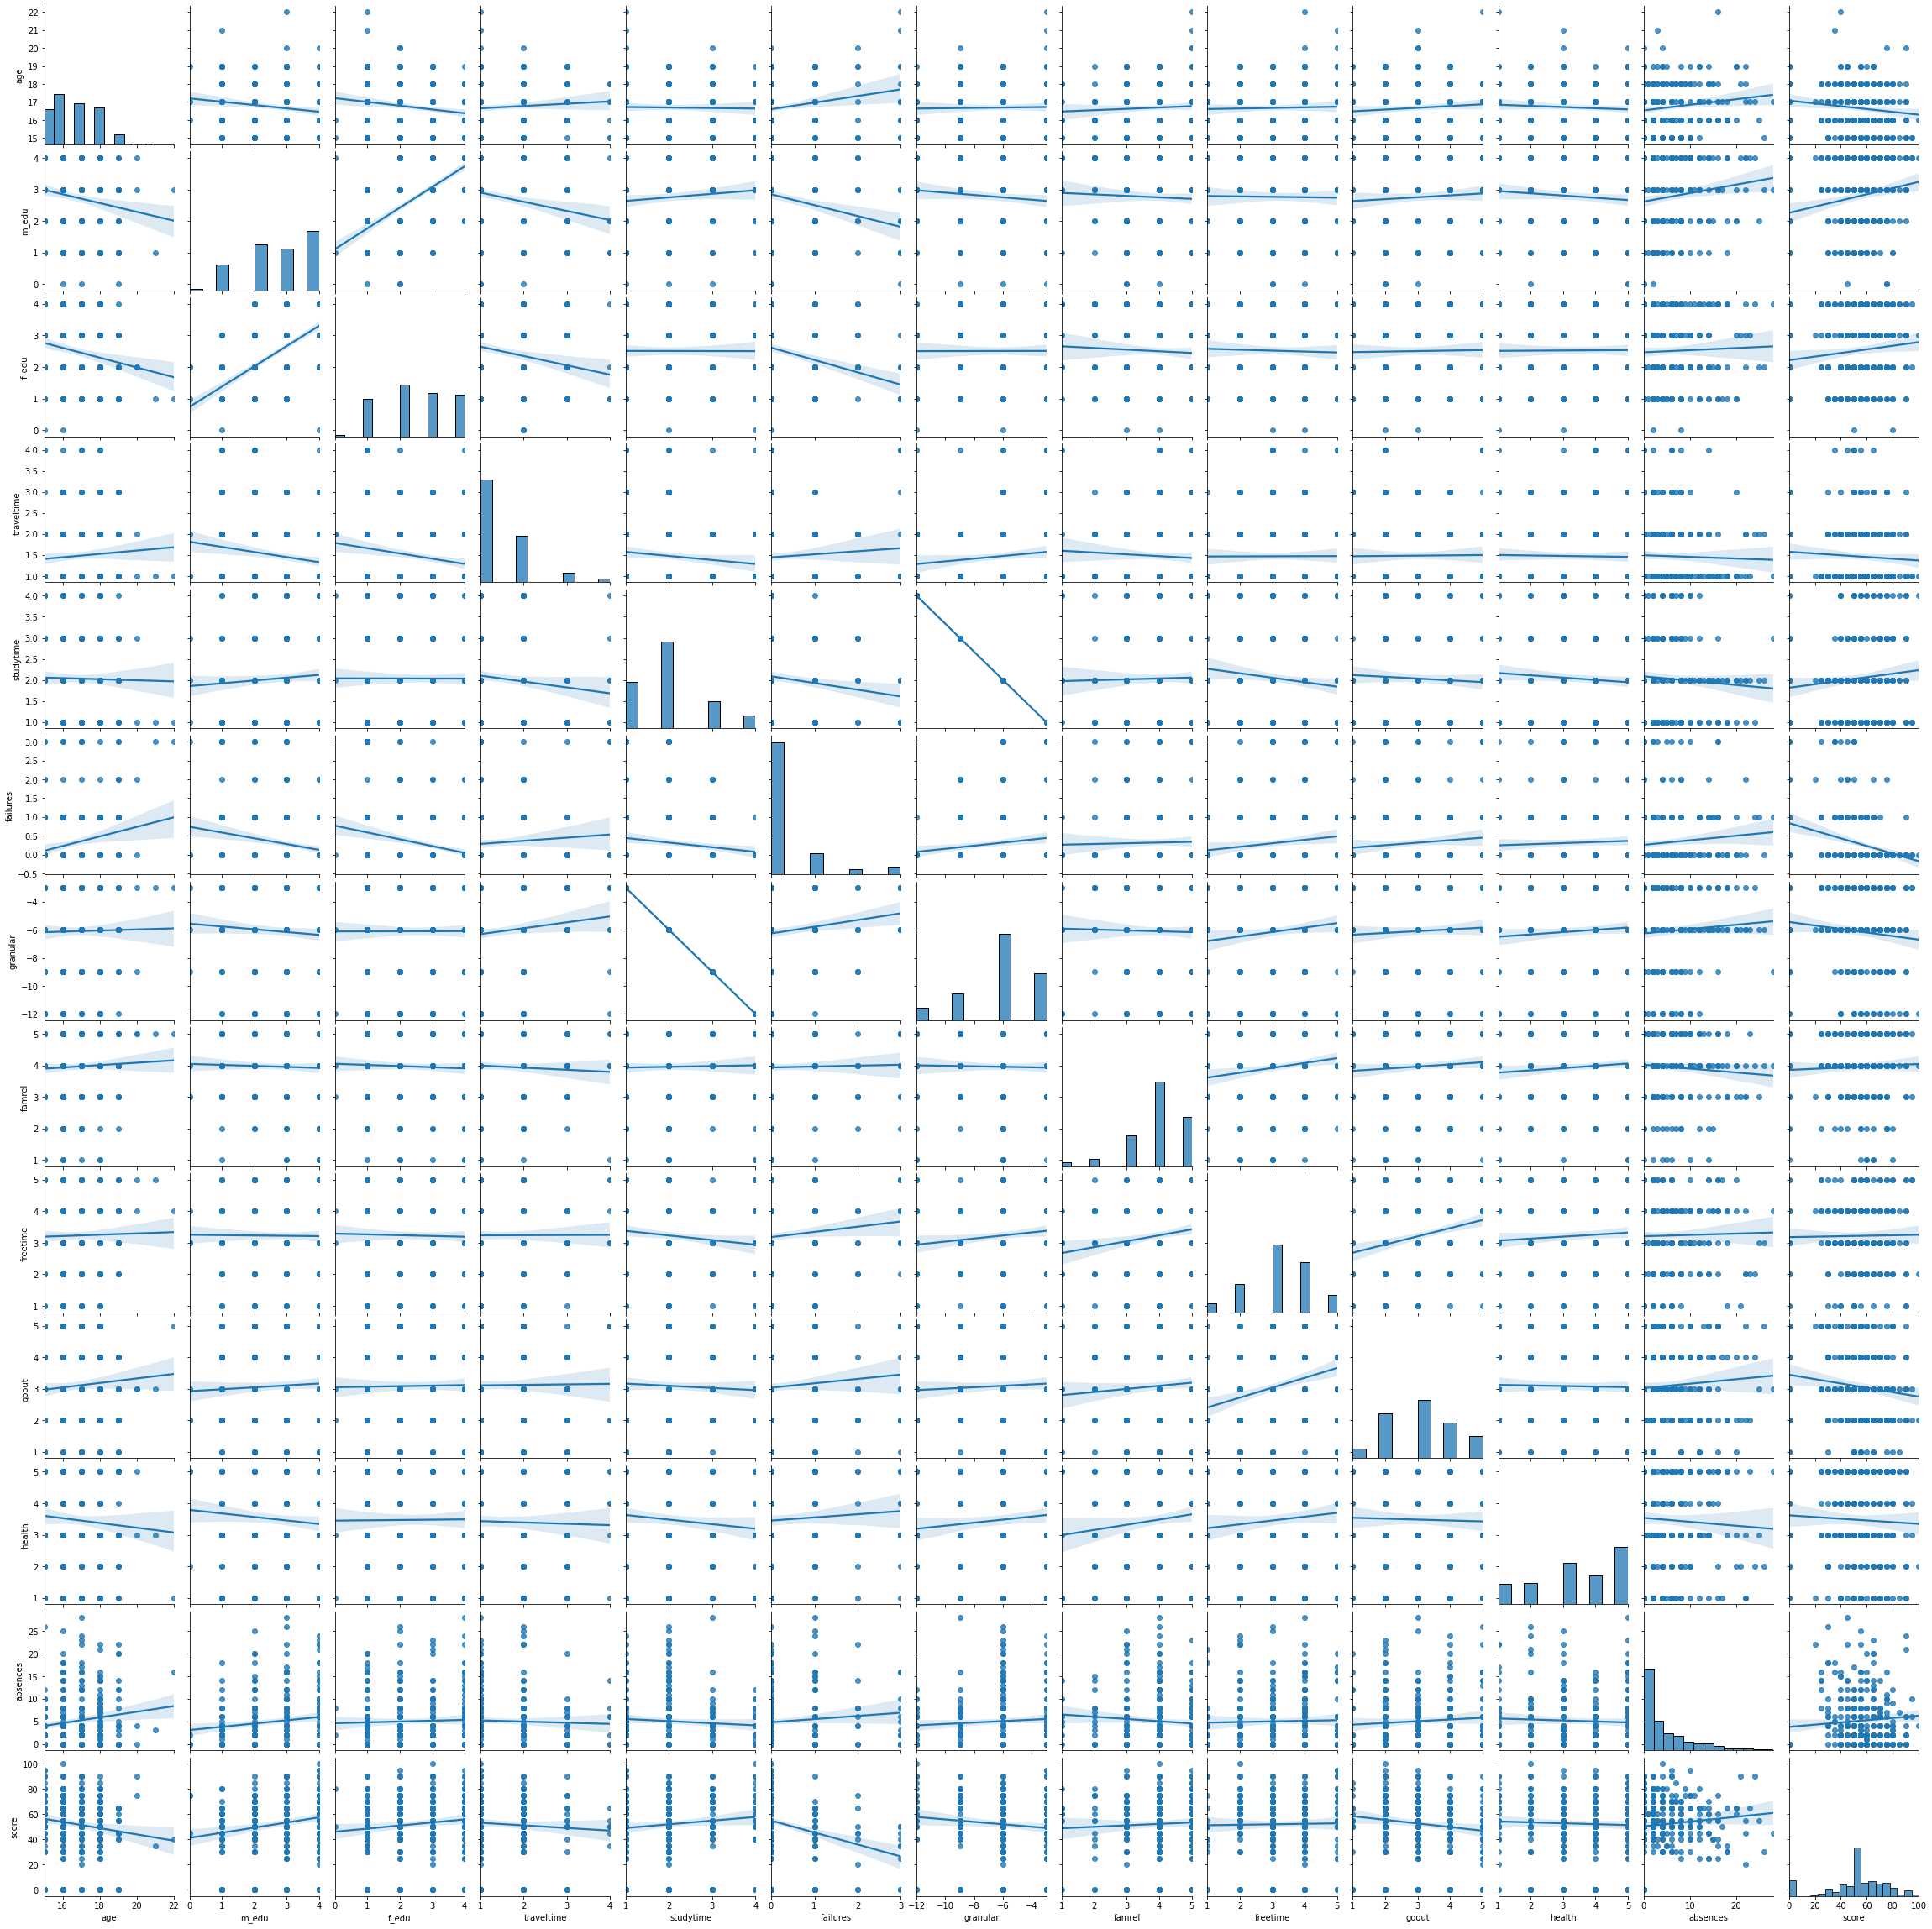

In [125]:
sns.pairplot(df_stud_math, kind='reg')

In [126]:
df_stud_math.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160640,-0.180374,0.071522,-0.019091,0.215561,0.019091,0.052474,0.025704,0.083073,-0.069732,0.139250,-0.139373
m_edu,-0.160640,1.000000,0.649219,-0.188015,0.086489,-0.229861,-0.086489,-0.038619,-0.011934,0.060433,-0.088923,0.139417,0.199676
f_edu,-0.180374,0.649219,1.000000,-0.192198,-0.001900,-0.265752,0.001900,-0.043433,-0.026670,0.016701,0.007869,0.035307,0.118016
traveltime,0.071522,-0.188015,-0.192198,1.000000,-0.116276,0.077794,0.116276,-0.053748,0.003172,0.010804,-0.021743,-0.031587,-0.065592
studytime,-0.019091,0.086489,-0.001900,-0.116276,1.000000,-0.139747,-1.000000,0.022231,-0.124377,-0.053724,-0.089141,-0.069704,0.110487
failures,0.215561,-0.229861,-0.265752,0.077794,-0.139747,1.000000,0.139747,0.023320,0.123248,0.095660,0.054011,0.092175,-0.309629
granular,0.019091,-0.086489,0.001900,0.116276,-1.000000,0.139747,1.000000,-0.022231,0.124377,0.053724,0.089141,0.069704,-0.110487
famrel,0.052474,-0.038619,-0.043433,-0.053748,0.022231,0.023320,-0.022231,1.000000,0.169900,0.081525,0.108760,-0.078307,0.046462
freetime,0.025704,-0.011934,-0.026670,0.003172,-0.124377,0.123248,0.124377,0.169900,1.000000,0.284751,0.087366,0.023605,0.017055
goout,0.083073,0.060433,0.016701,0.010804,-0.053724,0.095660,0.053724,0.081525,0.284751,1.000000,-0.022803,0.073921,-0.141034


### Выводы по матрице корреляции:
1. age (возраст ученика): 
- имеется слабая обратная корреляция между age и m_edu, f_edu (образованием родителей), что довольно логично, так как ученик может получать дополнительную помощь/совет от родителей  с более высоким по уровню образованием при решении домашней работы или подготовке к экзаменам. 
- имеется слабая прямая корреляция age с числом failures (количеством внеучебных неудач), результат не такой очевидный, так как в значение 0 попадают и те, кто не делал внеучебные ошибки и те, кто сделал их более 3.
- имеется слабая прямая корреляция age с числом absences (количеством пропущенных занятий), результат возможно объяснить, так как, например, школьники более старшего возраста могут дополнительно подрабатывать и просыпать учебу.
- имеется слабая обратная корреляция между age и score (баллами по госэкзамену). Возможно это связано с тем, что более старшим ученикам сложнее усваивать материал. 
2. m_edu и f_edu (образование родителей) имеют сильную корреляцию, что довольно логично, так как при создании семьи одним из параметров может рассматриваться образование супруга/супруги.
- m_edu и f_edu имеют слабую обратную корреляцию с traveltime (время в пути до школы), возможно это связано тем, что более образованные родители финансово более обеспечены и могут выбирать место для жизни, в т.ч. с учетом расположения школы.
- m_edu и f_edu имеют слабую обратную корреляцию с failures (числом внеучебных неудач), возможно это связано тем, что более образованные родители больше занимаются воспитанием и выбором досуга для ребенка из-за чего число внеучебных неудач может быть уменьшено.
- m_edu и f_edu имеют слабую корреляцию с score (баллы по госэкзамену по математике), возможно это связано тем, что более образованные родители больше уделяют времени, больше участвуют в развитии и образовании школьника.
3. traveltime (время в пути до школы): 
- traveltime имеет слабую обратную корреляцию с m_edu и f_edu (см. выше); 
- traveltime имеет слабую обратную корреляцию с studytime (время на учёбу помимо школы в неделю), что довольно логично, так как чем меньше времени тратится на дорогу, тем больше времени есть, в т.ч. на учебу помимо школы;
- traveltime и granular - не рассмаотривается, так как далее переменная granular будет исключена.
4. studytime (время на учёбу помимо школы в неделю):
- studytime и granular имеют имеет строгую обратную связь, поэтому одну переменную можно исключить. Пусть это будет неописанная в условиях задачи переменная granular.
- studytime имеет слабую обратную корреляцию с traveltime (см. выше);
- studytime имеет слабую обратную корреляцию с failures (числом внеучебных неудач) и freetime (свободное время после школы), что довольно логично, так как дополнительные занятия улучшают развитие школьника и одновременно уменьшают свободное время;
- studytime имеют слабую корреляцию с score (баллы по госэкзамену по математике), возможно это связано тем, что  дополнительные занятия улучшают подготовку школьника.
5. failures (число внеучебных неудач):
- имеется слабая корреляция между failures и age (см. выше);
- имеется слабая обратная корреляция между failures и m_edu / f_edu (см. выше);
- имеется слабая обратная корреляция между failures и studytime (см. выше);
- имеется слабая корреляция между failures и freetime (свободное время после школы), возможно это связано тем, что  свободное время после школы тратятся на дополнительные занятия и улучшают подготовку школьника;
- имеется слабая обратная корреляция между failures и score (баллы по госэкзамену по математике), это может быть связано с многими параметрами: большим временем на подготовку (лучшей подготовкой), большей уверенностью ученика в своих силах и т.п.;
6. famrel (семейные отношения):
- имеется слабая корреляция famrel с freetime (свободное время после школы), в семье с хорошими отношениями, у школьника могут меньше отслеживать, как он распределяет свое время, в т.ч. вне школы;
- имеется слабая корреляция famrel с health (текущее состояние здоровья), что также довольно логично.
7. freetime (свободное время после школы):
- имеется слабая обратная корреляция между freetime и studytime (см. выше);
- имеется слабая корреляция между freetime и failures (см. выше);
- имеется слабая корреляция между freetime и famrel (см. выше);
- имеется слабая корреляция между freetime и goout (проведение времени с друзьями), что довольно логично, так как чем больше совбодного времени, тем больше времени школьники могут проводить с друзьями.
8. goout (проведение времени с друзьями):
- имеется слабая корреляция между goout и freetime (см. выше);
- goout имеют слабую обратную корреляцию с score (баллы по госэкзамену по математике), возможно это связано с тем, что школьники тратят больше времени с друзьями и меньше времени на подготовку.
9. health (текущее состояние здоровья):
- имеется слабая корреляция health с famrel (см. выше);
10. absences (количество пропущенных занятий):
- имеется слабая корреляция absences с age и m_edu (см. выше). Важно отметить, что образование отца меньше влияет на количестве пропусков школьника, чем образование матери (возможно матери лучше в этом отношении более ответсвенны либо не работают и могут уделить больше времени школьнику);
11. score (баллы по госэкзамену по математике):
- имеется слабая обратная корреляция score с age, failures (наибольшая слабая обратная корреляция на score), goout (см. выше);
- имеется слабая корреляция score с m_edu (наибольшая слабая прямая корреляция на score), f_edu, studytime (см. выше).  
12. Остальные переменные, помимо описанных, менее скоррелированы.


In [127]:
df_stud_math.drop('granular', axis=1, inplace=True)

## 4. Анализ номинативных переменных 

Для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

In [128]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=column, y='score',
                data=df_stud_math,  # данных в столбцах не много
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# data=df_stud_math.loc[df_stud_math.loc[:, column].isin(df_stud_math.loc[:, column].value_counts().index[:10])]
# когда в столбце много значений и выделяем 10 наиболее встречающихся

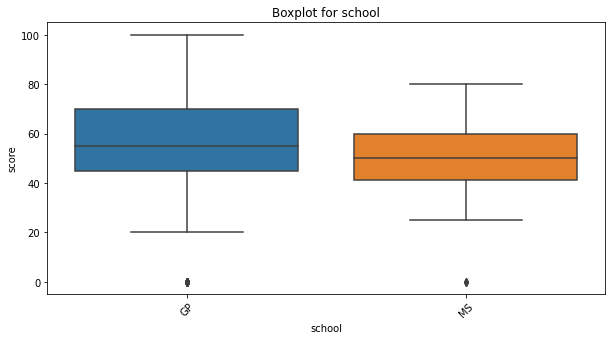

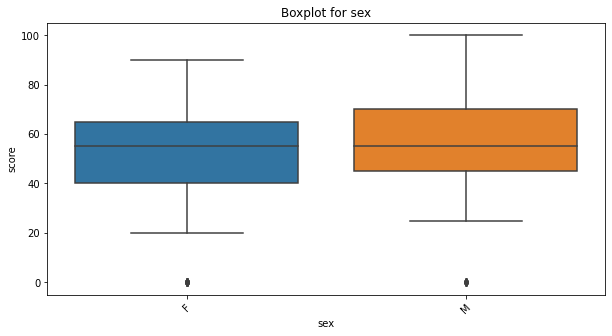

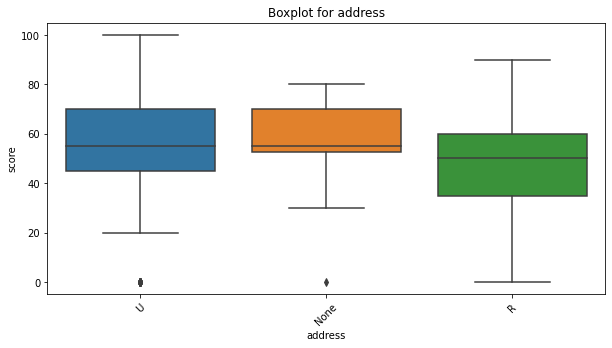

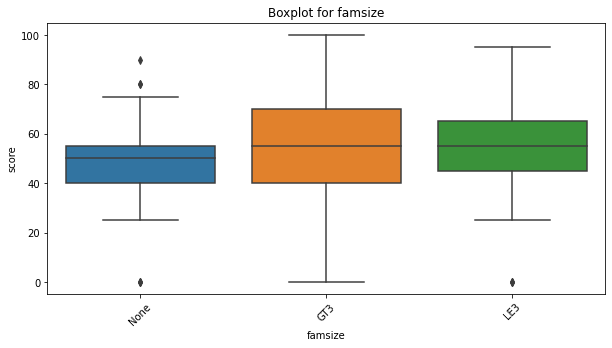

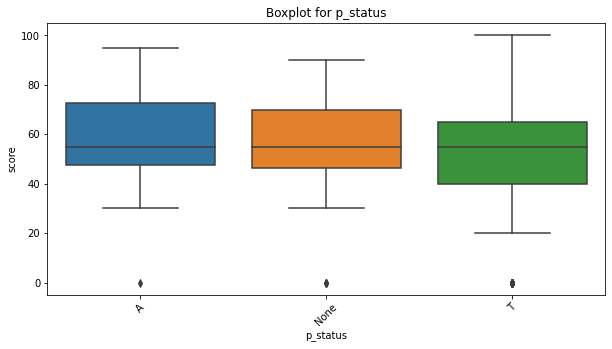

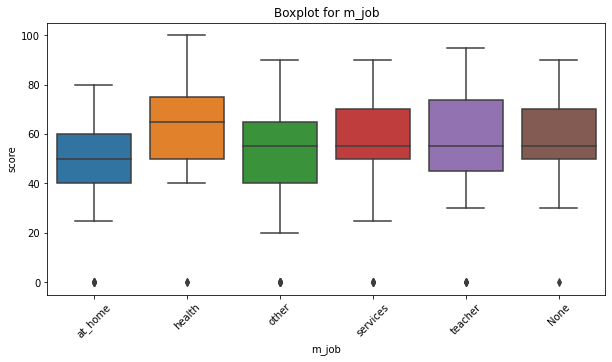

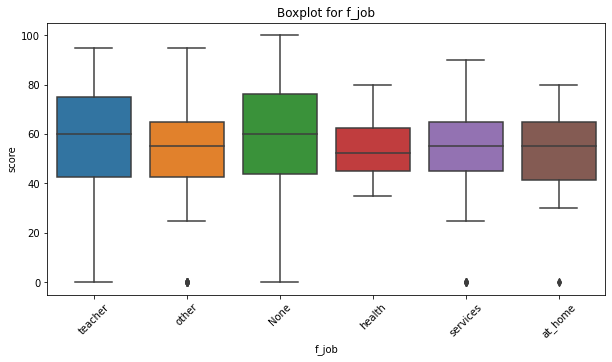

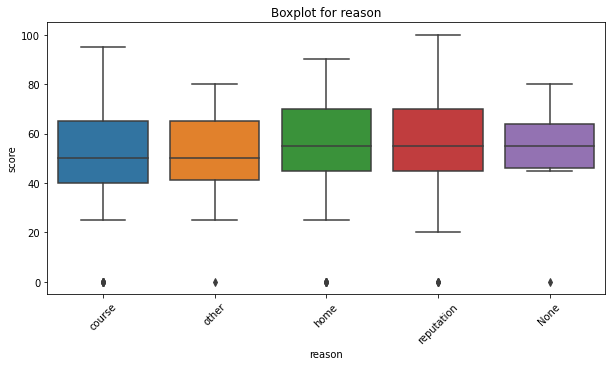

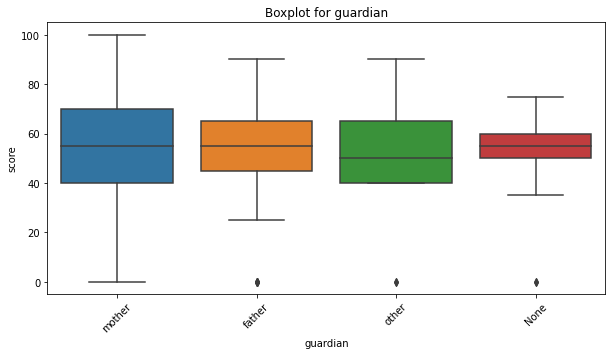

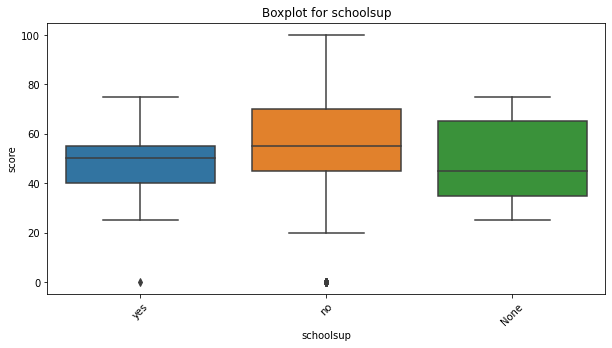

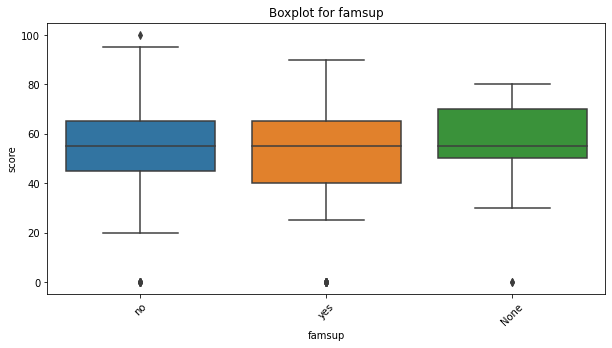

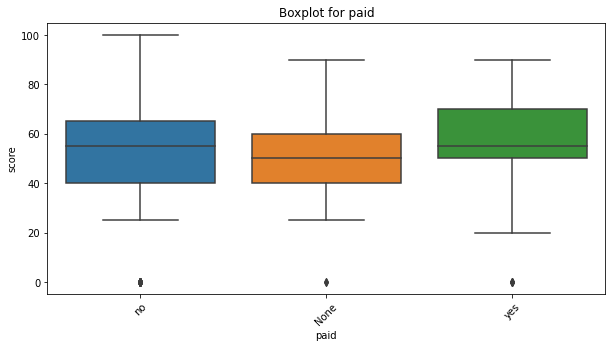

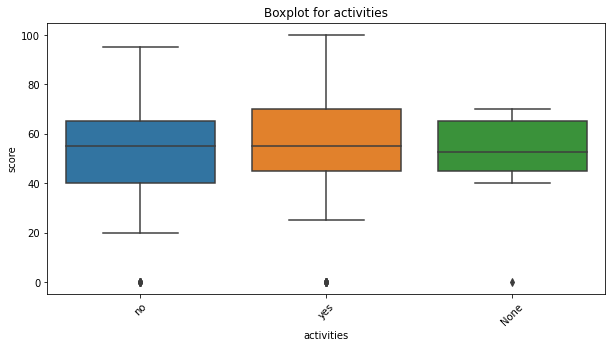

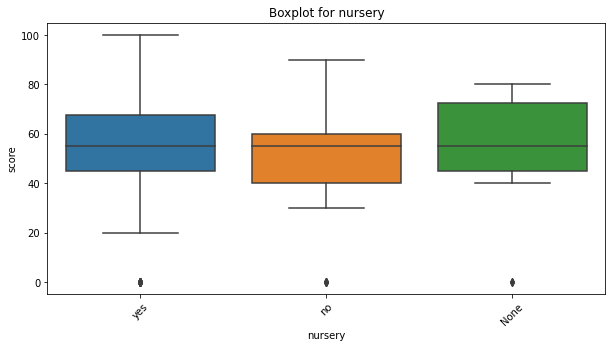

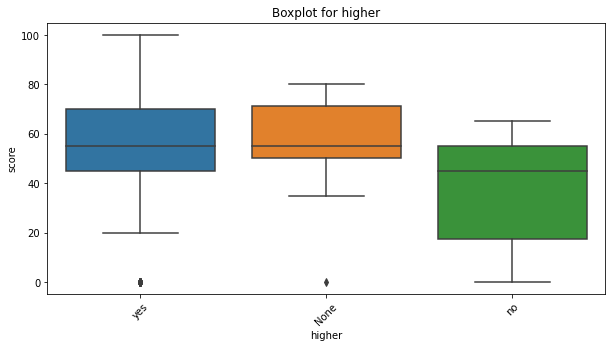

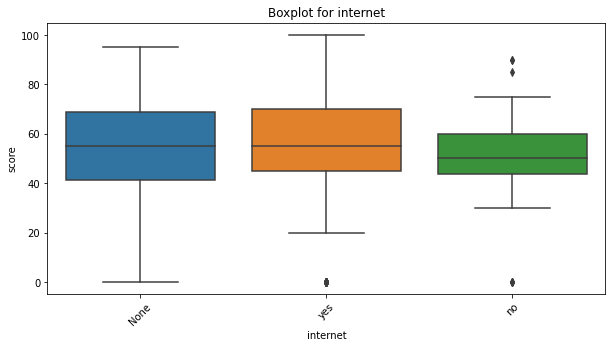

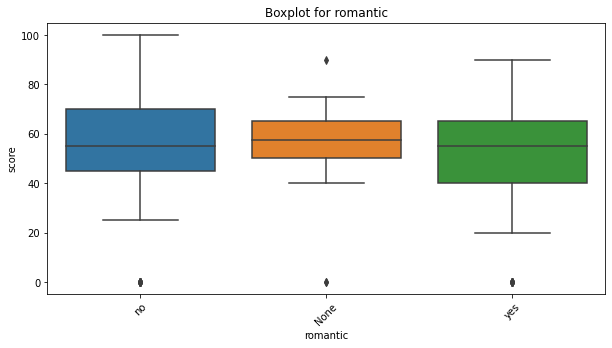

In [129]:
for col in object_cols:
    get_boxplot(col)

По графикам похоже, что все параметры могут влиять на оценку итоговый балл по госэкзамену по математике. 
Графики являются вспомогательным инструментом. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по госэкзамену по математике по различным параметрам неразличимы:

In [130]:
def get_stat_dif(column, alpha):
    """ aplpha - уровень значимости"""

    cols = df_stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df_stud_math.loc[df_stud_math.loc[:, column] == comb[0], 'score'],
                     df_stud_math.loc[df_stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= alpha/len(combinations_all):  # Учли поправку Бонферони
            print(
                'Найдены статистически значимые различия для колонки {} с уровнем значимости {}'.format(
                    column, alpha))
            break

In [131]:
for col in object_cols:
    get_stat_dif(col, 0.05)
# Не найдены статистически значимые различия для всех колонок с уровнем значимости 0.05

In [132]:
for col in object_cols:
    get_stat_dif(col, 0.08)

Найдены статистически значимые различия для колонки higher с уровнем значимости 0.08


In [133]:
for col in object_cols:
    get_stat_dif(col, 0.1)

Найдены статистически значимые различия для колонки higher с уровнем значимости 0.1


In [134]:
for col in object_cols:
    get_stat_dif(col, 0.13)

Найдены статистически значимые различия для колонки famsize с уровнем значимости 0.13
Найдены статистически значимые различия для колонки higher с уровнем значимости 0.13


In [135]:
for col in object_cols:
    get_stat_dif(col, 0.15)

Найдены статистически значимые различия для колонки famsize с уровнем значимости 0.15
Найдены статистически значимые различия для колонки m_job с уровнем значимости 0.15
Найдены статистически значимые различия для колонки higher с уровнем значимости 0.15


In [136]:
for col in object_cols:
    get_stat_dif(col, 0.2)

Найдены статистически значимые различия для колонки famsize с уровнем значимости 0.2
Найдены статистически значимые различия для колонки m_job с уровнем значимости 0.2
Найдены статистически значимые различия для колонки higher с уровнем значимости 0.2


### Вывод по проверке нулевой гипотезы: 
- с уровнем значимости 0.05 статистически значимых различий не найдено;
- с уровнем значимости 0.08 отличаются только один параметр: higher;
- с уровнем значимости 0.13 отличаются два параметра: higher, famsize;
- с уровнем значимости 0.15 отличаются два параметра: higher, famsize, m_job;  

Несмотря на довольно большую ошибку первого рода (0.15), оставим переменные higher, famsize, m_job в датасете для дальнейшего построения модели. Далее можно последовательно исключить m_job и famsize и посмотреть на результаты работы будущей модели.

**Важные переменные**, которые, возможно, оказывают влияние на количество баллов, это: age, failures, goout, m_edu, f_edu, studytime, higher, famsize, m_job. Оставим эти переменные в датасете для дальнейшего построения модели.

In [137]:
filtered_columns = ['age', 'm_edu', 'f_edu', 'studytime',
                    'failures', 'goout', 'famsize', 'm_job', 'higher']
df_stud_math_for_model = df_stud_math.reindex(columns=filtered_columns)
df_stud_math_for_model.head()

,age,m_edu,f_edu,studytime,failures,goout,famsize,m_job,higher
0,18,4.0,4.0,2.0,0.0,4.0,None,at_home,yes
1,17,1.0,1.0,2.0,0.0,3.0,GT3,at_home,yes
2,15,1.0,1.0,2.0,3.0,2.0,LE3,at_home,yes
3,15,4.0,2.0,3.0,0.0,2.0,GT3,health,yes
4,16,3.0,3.0,2.0,0.0,2.0,GT3,other,yes


## 5. Итоговые выводы по анализу:

- В данных достаточное количество пустых значений (nan) - до 45 шт (более 10% столбца p_status (Pstatus)), что довольно много. Далее нужно заполнить пустые значения (среднее, выбор значения по иным признакам и т.п.);
- Выбросы найдены только в столбцах с f_edu (Fedu - образование отца), famrel (семейные отношения), absences  (количество пропущенных занятий), которые нельзя объяснить условиями задачи и/или здравым смыслом. Указанное позволяет сделать вывод о том, что данные достаточно чистые;
- Обратная корреляция между score (баллы по госэкзамену по математике) и failures (количество внеучебных неудач),  может быть связано с многими параметрами: большим временем на подготовку (лучшей подготовкой) и как следствием меньшим числом ошибок, в т.ч. внеучебное время; большей уверенностью ученика в своих силах и т.п.;
- Прямая корреляция между score (баллы по госэкзамену по математике) и m_edu(Medu — образование матери) возможно это связано тем, что более образованные родители (мать) больше уделяют времени, больше участвуют в развитии и образовании школьника;
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это **age, failures, goout, m_edu, f_edu, studytime, higher, famsize, m_job**.